In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

In [4]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


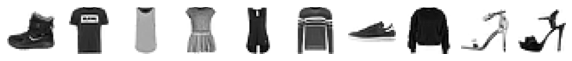

In [7]:
fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [8]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
pd.Series(train_target).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [10]:
train_input[0].shape

(28, 28)

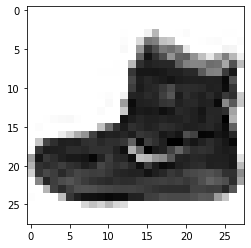

In [11]:
plt.imshow(train_input[0], cmap='gray_r')

In [12]:
train_input.shape

(60000, 28, 28)

In [13]:
train_input[0].shape

(28, 28)

In [14]:
x_train = train_input.reshape(60000, 28*28)
x_test = test_input.reshape(10000, 28*28)
y_train = train_target
y_test = test_target

In [15]:
x_train[0].shape

(784,)

In [16]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
y_train_oh

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
# logisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8412

In [21]:
# deep learning

In [22]:
model = Sequential()
model.add(Dense(128, input_dim=28*28, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 56)                7224      
                                                                 
 dense_2 (Dense)             (None, 10)                570       
                                                                 
Total params: 108,274
Trainable params: 108,274
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [24]:
x_train.shape

(60000, 784)

In [25]:
y_train_oh.shape

(60000, 10)

In [ ]:
hist = model.fit(x_train.astype(float), y_train_oh, validation_split=0.2, epochs=50, batch_size=20)

In [27]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 2s 5ms/step - loss: 0.7394 - accuracy: 0.8524


[0.7394232749938965, 0.852400004863739]

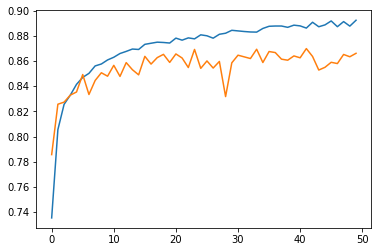

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
# Conv2D

In [31]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [32]:
x_train_cov = train_input.reshape(60000, 28, 28, 1)
x_test_cov = test_input.reshape(10000, 28, 28,1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

In [64]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
hist = model.fit(x_train_cov, y_train_oh, epochs=10, batch_size=10, validation_split=0.2)

In [37]:
model.evaluate(x_test_cov, y_test_oh)

313/313 [==============================] - 2s 5ms/step - loss: 0.3670 - accuracy: 0.8965


[0.3670412003993988, 0.8964999914169312]

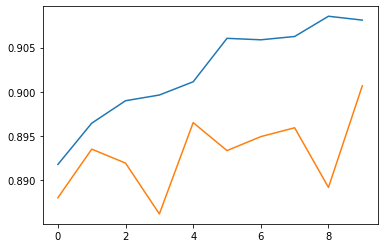

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
model.summary()

In [41]:
from tensorflow.keras import utils

In [ ]:
utils.plot_model(model, show_shapes = True)

In [ ]:
# filter print

In [52]:
model.layers

In [53]:
model.layers[0]

In [ ]:
model.layers[0].weights[0]

In [67]:
conv1 = model.layers[0]
conv1_weights = conv1.weights[0].numpy()

In [68]:
conv1_weights.shape

(3, 3, 1, 32)

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv1_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

In [ ]:
# layer output print

In [70]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_4_input')>

In [73]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_4')>

In [74]:
from tensorflow.keras.models import Model

In [75]:
conv_acti = Model(model.input, model.layers[0].output)

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [77]:
inputs = train_input[0].reshape(-1, 28, 28,1)
feature_maps = conv_acti.predict(inputs)

In [ ]:
fig, axs = plt.subplots(4,8, figsize=(15,8))

for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:, i*8+j])
    axs[i,j].axis('off')
    
plt.show()